# 데이터 정제
---
- 데이터 정제란 결측치나 이상치를 처리하는 방법

## 결측치
- 결측치 소거 `삭제`
- 단순 대치 `특정값으로 변환`
- 다중 대치 `여러번 변환하여 완전 자료를 만듬`

### 소거

In [3]:
from pandas import DataFrame
from pandas import read_excel

성적표xlsx = 성적표 = read_excel("http://itpaper.co.kr/data/grade_card.xlsx", engine='openpyxl')
성적표xlsx

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN
3,수현,3,여자,63,60.0,31.0,70.0
4,호영,4,남자,120,50.0,NaN,88.0


In [4]:
성적표 = 성적표xlsx.set_index('이름')
성적표

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


In [5]:
# 결측치 확인
결측치여부 = 성적표.isna()
결측치여부

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,False,False,False,True,False,False
영희,False,False,False,False,False,False
민수,False,False,False,False,True,True
수현,False,False,False,False,False,False
호영,False,False,False,False,True,False


In [6]:
# 결측치 수 파악
결측치합계 = 결측치여부.sum()
결측치합계

학년    0
성별    0
국어    0
영어    1
수학    2
과학    1
dtype: int64

In [7]:
# 결측치 소거
na1 = 성적표.dropna()
na1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
영희,2,여자,88,90.0,62.0,72.0
수현,3,여자,63,60.0,31.0,70.0


In [8]:
# 수학에 결측치가 있는 행만 삭제

na2 = 성적표.dropna(subset=['수학'])
na2

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
수현,3,여자,63,60.0,31.0,70.0


In [9]:
# 횅에 포함된 모든 값이 결측일때 삭제
na2 = 성적표.dropna(how='all')
na2

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


In [10]:
# 결측치가 포함된 모든 열 삭제
na3 = 성적표.dropna(axis = 1)
na3

,학년,성별,국어
이름,,,
철수,1,남자,98
영희,2,여자,88
민수,1,남자,92
수현,3,여자,63
호영,4,남자,120


In [11]:
# 열에 포함된 모든 열 삭제
na4 = 성적표.dropna(how='all', axis=1)
na4

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


## 결측치 대체

10만건 중에서 1000건 미만의 결측치라면 소거해도 분석 결과에 큰 영향이 없지만 100건 중의 10건이라면 소거법을 적용했을 때 분석 결과에 자칫 큰 영향을 줄 수 있다.

그러므로 결측치 소거보다는 다른 값으로 대체하는 처리를 하는 것이 더욱 바람직하다.

### 결측치 대체 기준

- **연속형 변수** : 평균이나 중앙값으로 대체
    - 수량적 특성에 의한 구분
- **이산형 변수** : 최빈값(가장 많이 등장하는 값)으로 대체
    - `value_counts()` 함수를 사용하여 빈도를 구할 수 있다.
    - 범주를 갖는 데이터.
    - 범주형 데이터에는 논리적 순서가 없을 수도 있다.
    - 성별, 재료 유형, 결제 방법 등

### 결측치를 대체할 때 고려되어야 하는 사항들

- 결측치의 비율
- 데이터의 분포
- 다른 변수와의 관계가 있는지

In [12]:
대표값_대치 =성적표.fillna(value = 50)
대표값_대치

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,50.0,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,50.0,50.0
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,50.0,88.0


In [13]:
# 평균 대치, 단순확률 대치
from pandas import merge
from sklearn.impute import SimpleImputer # 통계기반 결측치 정제툴
import numpy as np

# 결측치 대체 규칙을 정함
# 각 열단위로 평균을 결측치에 지정
정제규칙 = SimpleImputer(missing_values =np.nan, strategy='mean')
정제규칙

SimpleImputer()

In [14]:
# 정제해야 하는 컬럼 추출

정제대상 = 성적표.filter(['국어', '수학', '영어','과학'])
정제대상

,국어,수학,영어,과학
이름,,,,
철수,98,88.0,NaN,64.0
영희,88,62.0,90.0,72.0
민수,92,NaN,70.0,NaN
수현,63,31.0,60.0,70.0
호영,120,NaN,50.0,88.0


In [15]:
# 규칙 적용
정제규칙_적용결과 = 정제규칙.fit_transform(정제대상.values)
print(type(정제규칙_적용결과))
정제규칙_적용결과

<class 'numpy.ndarray'>


array([[ 98.        ,  88.        ,  67.5       ,  64.        ],
       [ 88.        ,  62.        ,  90.        ,  72.        ],
       [ 92.        ,  60.33333333,  70.        ,  73.5       ],
       [ 63.        ,  31.        ,  60.        ,  70.        ],
       [120.        ,  60.33333333,  50.        ,  88.        ]])

In [16]:
# 데이터 프레임 생성

결측치정제 = DataFrame(정제규칙_적용결과, index=정제대상.index, columns=정제대상.columns)
결측치정제

,국어,수학,영어,과학
이름,,,,
철수,98.0,88.000000,67.5,64.0
영희,88.0,62.000000,90.0,72.0
민수,92.0,60.333333,70.0,73.5
수현,63.0,31.000000,60.0,70.0
호영,120.0,60.333333,50.0,88.0


In [17]:
# 정제과정에서 제외된 컬럼 추출 및 병합

tmp = 성적표.filter(['학년','성별'])
tmp

결측치완료 = merge(tmp, 결측치정제, left_index=True, right_index=True)
결측치완료

,학년,성별,국어,수학,영어,과학
이름,,,,,,
철수,1,남자,98.0,88.000000,67.5,64.0
영희,2,여자,88.0,62.000000,90.0,72.0
민수,1,남자,92.0,60.333333,70.0,73.5
수현,3,여자,63.0,31.000000,60.0,70.0
호영,4,남자,120.0,60.333333,50.0,88.0


# 이상치

## 1) 이상치란?

---

- 의도하지 않게 잘못 입력한 경우 (Bad data)
- 의도한 상태로 입력되었으나 분석 목적에 부합되지 않아 제거해야 하는 경우 (Bad data)
- 의도하지 않은 현상이지만 분석에 포함해야 하는 경우
- 의도된 이상값 (fraud, 불량)인 경우
- 이상값을 꼭 제거해야 하는 것은 아니기 때문에 분석의 목적이나 종류에 따라 적절한 판단이 필요하다 .

## 2) 극단치

---

이상치의 한 종류. 

오류는 아니지만 굉장히 드물게 발생하는 극단적인 값.

ex) 몸무게 변수에 200kg 이상의 값이 있다면, 존재할 가능성은 있지만 굉장히 드문 경우이므로 극단치라 볼 수 있다.

## 3) 극단치의 인식 방법

---

극단치 제거를 위해 먼저 어디까지를 정상 범위로 볼 것인가를 정해야 한다.

### **논리적으로 판단하여 정하기**

- 성인의 몸무게가 40~150kg를 벗어나는 경우는 상당히 드물 것으로 판단하고, 이 범위를 벗어나면 극단치로 간주하는 것이다.

### **통계적인 기준을 이용하기 : ESD (Extreme Studentized Deviation)**

- 상하위 `0.3%` 또는 +-3 표준 편차에 해당할 만큼 극단적으로 크거나 작으면 극단치로 간주하는 방법

    $$기하평균-2.5\times표준편차 < data < 기하평균+2.5\times표준편차$$


### **상자그림 확인하기 (권장, 가장 쉬움)**

- 파이썬이 통계적인 기준을 적용해서 중심에서 크게 벗어난 값을 극단치로 간주하여 극단치가 원으로 표시된다.
- Q1-1.5(Q3-Q1)< data< Q3+1.5(Q3-Q1)를 벗어나는 데이터

## 4) 극단값 처리

---

### 극단값 조정 방법

- 상한값과 하한값을 벗어나는 값들을 결측치로 바꾸어 활용

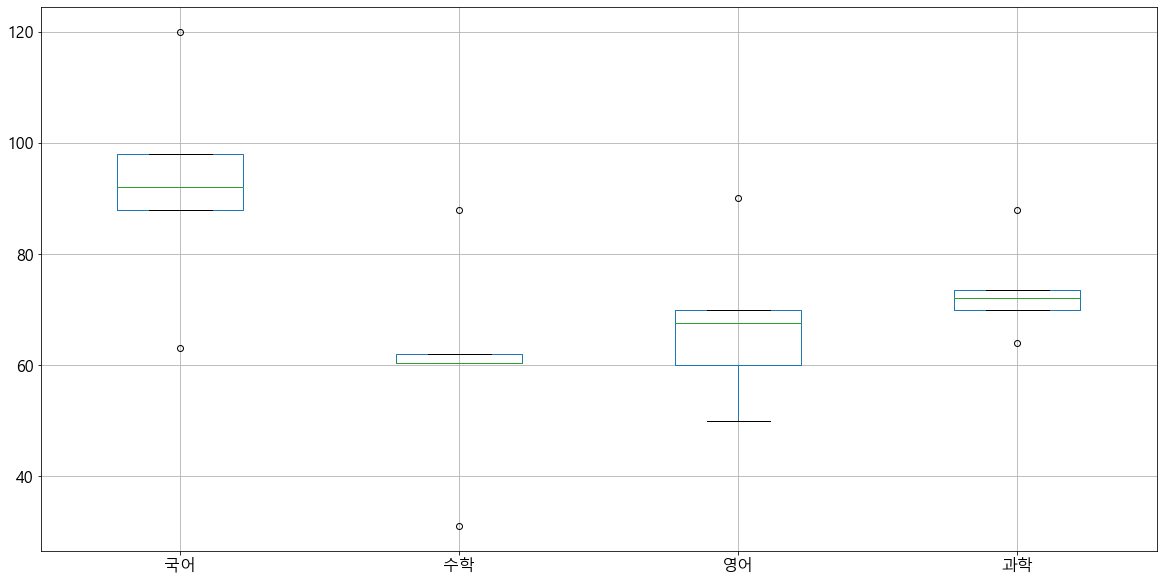

In [20]:
from matplotlib import pyplot as plt


# 학년, 성별데이터 제외 (명목형변수)
결측치완료['학년'] = 결측치완료['학년'].astype('category')
결측치완료['성별'] = 결측치완료['성별'].astype('category')

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (20, 10)
결측치완료.boxplot()
plt.show()

In [23]:
# 이상치를 결측치로

# 국어점수 사분위수
q1 = 결측치완료['국어'].quantile(q=0.25)
q3 = 결측치완료['국어'].quantile(q=0.75)
print('1사분위 수 %f, 3사분위 수 : %f' %(q1,q3))

1사분위 수 88.000000, 3사분위 수 : 98.000000


In [25]:
# 국어점수의 위 극단치 경계값
top_limit = q3 + 1.5 * (q3-q1)
top_limit

113.0

In [26]:
이상치데이터 = 결측치완료.query('국어 > @top_limit')
이상치데이터

,학년,성별,국어,수학,영어,과학
이름,,,,,,
호영,4,남자,120.0,60.333333,50.0,88.0


In [27]:
이상치인덱스 = list(이상치데이터.index)
이상치인덱스

['호영']

In [28]:
for i in 이상치인덱스:
    결측치완료.loc[i,'국어'] = np.nan
결측치완료

,학년,성별,국어,수학,영어,과학
이름,,,,,,
철수,1,남자,98.0,88.000000,67.5,64.0
영희,2,여자,88.0,62.000000,90.0,72.0
민수,1,남자,92.0,60.333333,70.0,73.5
수현,3,여자,63.0,31.000000,60.0,70.0
호영,4,남자,NaN,60.333333,50.0,88.0


### 변경된 결측치 정제

In [29]:
정제규칙 = SimpleImputer(missing_values=np.nan, strategy='mean')

정제대상 = 결측치완료.filter(['국어', '수학', '영어', '과학'])
정제대상

정제규칙_적용결과 = 정제규칙.fit_transform(정제대상.values)
정제규칙_적용결과

array([[98.        , 88.        , 67.5       , 64.        ],
       [88.        , 62.        , 90.        , 72.        ],
       [92.        , 60.33333333, 70.        , 73.5       ],
       [63.        , 31.        , 60.        , 70.        ],
       [85.25      , 60.33333333, 50.        , 88.        ]])

In [30]:
이상치정제 = DataFrame(정제규칙_적용결과, index = 정제대상.index , columns = 정제대상.columns)
이상치정제

,국어,수학,영어,과학
이름,,,,
철수,98.00,88.000000,67.5,64.0
영희,88.00,62.000000,90.0,72.0
민수,92.00,60.333333,70.0,73.5
수현,63.00,31.000000,60.0,70.0
호영,85.25,60.333333,50.0,88.0


In [31]:
tmp = 성적표.filter(['이름', '성별'])
tmp

,성별
이름,
철수,남자
영희,여자
민수,남자
수현,여자
호영,남자


In [32]:
이상치완료 = merge(tmp, 이상치정제, left_index=True, right_index=True)
이상치완료

,성별,국어,수학,영어,과학
이름,,,,,
철수,남자,98.00,88.000000,67.5,64.0
영희,여자,88.00,62.000000,90.0,72.0
민수,남자,92.00,60.333333,70.0,73.5
수현,여자,63.00,31.000000,60.0,70.0
호영,남자,85.25,60.333333,50.0,88.0
